# Minimal Pairs and Morpheme Boundaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from vdata import *

In [2]:
a = Voynich()
a.data.head()

,folio,line,paragraph,text,words
0,f1r,1,P1,fachys ykal ar ataiin shol shory cthres y kor ...,10
1,f1r,2,P1,sory ckhar or y kair chtaiin shar are cthar ct...,11
2,f1r,3,P1,syaiir sheky or ykaiin shod cthoary cthes dara...,9
3,f1r,4,P1,ooiin oteey oteos roloty cthar daiin otaiin or...,9
4,f1r,5,P1,dair y chear cthaiin cphar cfhaiin,6


In [3]:
words = ' '.join(a.data.text).split()
unique_words = list(set(words))
len(words), len(unique_words)

(37886, 8078)

In [4]:
from nltk.metrics.distance import edit_distance

edit_distance("chedy", "shedy")

1

In [9]:
import time
n = len(unique_words)

distances = np.zeros((n,n))

start = time.time()
for i,a in enumerate(unique_words):
    if i % 100 == 0:
        print(i, time.time() - start, 'seconds')
    
    for j,b in enumerate(unique_words):
        
        if j > i:
            break # only compute half the matrix
        
        if abs(len(a) - len(b)) > 1:
            continue # only want edit distance of 1
        
        distances[i,j] = edit_distance(a,b)

0 0.00012373924255371094 seconds
100 0.1479508876800537 seconds
200 0.546764612197876 seconds
300 1.1900663375854492 seconds
400 2.1136553287506104 seconds
500 3.256793260574341 seconds
600 4.679786443710327 seconds
700 6.31932258605957 seconds
800 8.175140142440796 seconds
900 10.44036865234375 seconds
1000 12.760658264160156 seconds
1100 15.537393808364868 seconds
1200 18.332337856292725 seconds
1300 21.5168354511261 seconds
1400 25.046238899230957 seconds
1500 28.913817644119263 seconds
1600 32.82796382904053 seconds
1700 36.82481384277344 seconds
1800 41.20519042015076 seconds
1900 45.79906678199768 seconds
2000 50.69585871696472 seconds
2100 55.983338832855225 seconds
2200 60.96560788154602 seconds
2300 66.61344051361084 seconds
2400 72.94546580314636 seconds
2500 79.27439165115356 seconds
2600 86.19141864776611 seconds
2700 92.96326851844788 seconds
2800 99.79141545295715 seconds
2900 106.39519548416138 seconds
3000 114.18552994728088 seconds
3100 122.1160933971405 seconds
3200 1

In [56]:
pairs = np.argwhere(distances == 1)

In [64]:
p = pairs[10]
unique_words[p[0]], unique_words[p[1]]

('okedyd', 'okedy')

In [126]:
# get the letter that's different
def spp(wordA, i):
    return (wordA[:i], wordA[i+1:])

def diff(wordA, wordB):
    """
    returns context, a, b letters
    """
    
    if len(wordA) == len(wordB):
        i = 0
        while wordA[i] == wordB[i]:
            i += 1
            
            # we've reached the end without finding a difference
            if i >= len(wordA):
                return []
        
        return spp(wordA, i), wordA[i], wordB[i]
    else:
        # note that this returns the first insertion, no matter the edit distance
        longer = wordA if len(wordA) > len(wordB) else wordB
        shorter = wordA if len(wordA) < len(wordB) else wordB
        
        i = 0
        while i < len(shorter) and longer[i] == shorter[i]:
            i += 1
            
        return spp(longer, i), longer[i], ''
    

diff('chedy', 'cheedy')

(('che', 'dy'), 'e', '')

In [132]:
import pandas as pd

stuff = []

for p in pairs:
    context, a,b = diff(unique_words[p[0]], unique_words[p[1]])
    
    stuff.append({'left': context[0], 
                  'right': context[1],
                  'change': a,
                  'other': b})

stuff = pd.DataFrame(stuff)
stuff
    

,change,left,other,right
0,o,,,kchod
1,e,ckh,,or
2,l,oteedy,,
3,k,o,t,aldal
4,e,otee,d,y
5,e,ok,o,dy
6,h,ck,,eor
7,e,ck,h,or
8,o,,q,okam
9,e,,k,chedy


In [155]:
letters = sorted(list(set(stuff.change) | set(stuff.other)))
print(letters)

['', 'a', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'v', 'x', 'y', 'z']


In [156]:
changes = np.zeros((len(letters), len(letters)))

In [157]:
g = stuff.groupby(['change', 'other'])
for a,b in g.groups:
    count = g.get_group((a,b)).count()
    changes[letters.index(a), letters.index(b)] += count['left']

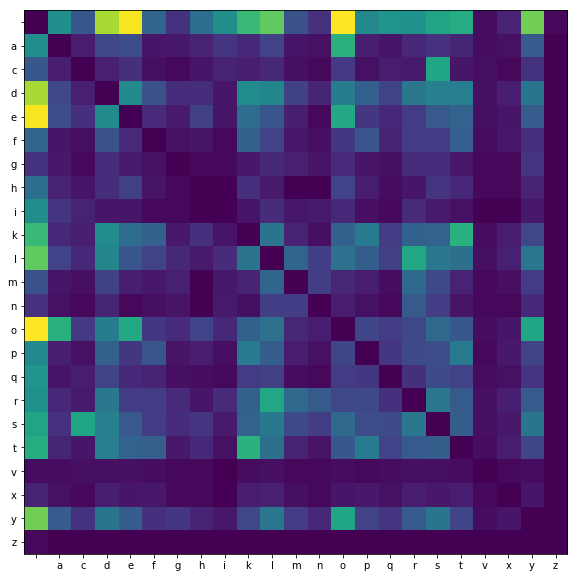

In [172]:
t = changes + changes.T

plt.figure(figsize=(10,10))
plt.imshow(t**.5)
_ = plt.yticks(range(len(letters)), letters)
_ = plt.xticks(range(len(letters)), letters)

So we can see that a few of the letters are replaced by each other more than others, as other scholars have found:
* *k* and *t* seem to be related
* *o* replaces *a*, *e*, and *y*
* *d*